---
title: Homework 5
author: Shao-Ting Chiu (UIN:433002162)
date: today
bibliography: ../ref.bib  
format:
    pdf:
        code-line-numbers: true
        table-of-contents: true 
        keep-tex: false
        
    html: 
        table-of-contents: true
jupyter: python3  
execute: 
    echo: true
    freeze: auto 
---


## Description

> Problems from the Book
> 
> 9.8
> 
> 11.11
> 
> Both problems are coding assignments, with starting code provided. Each is worth 40 points.

## Problem 9.8

> This assignment concerns the application of PCA to the soft magnetic alloy data set (See section A8.5).


### (a)

> Reproduce the plots in Figure 9.5 by running c09_PCA.py

In [1]:
""""
Foundations of Pattern Recognition and Machine Learning
Chapter 9 Figure 9.5
Author: Ulisses Braga-Neto

PCA example using the softt magnetic alloy dataset
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as ssc

In [2]:
# Fix random state for reproducibility
np.random.seed(0)

SMA = pd.read_csv('data/Soft_Magnetic_Alloy_Dataset.csv')

fn0 = SMA.columns[0:26]         # all feature names
fv0 = SMA.values[:,0:26]        # all feature values
rs0 = SMA['Coercivity (A/m)']   # select response

<ipython-input-3-9eb8e3ebafec>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


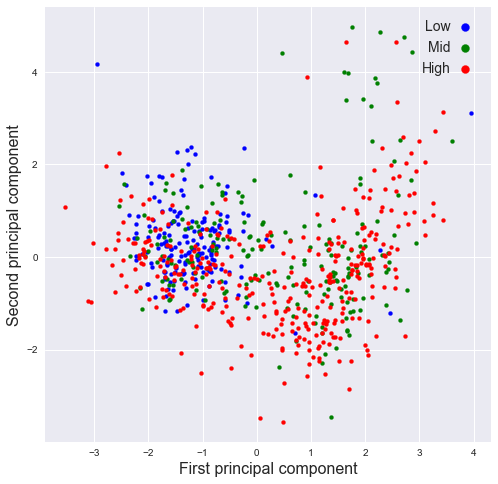

<ipython-input-3-9eb8e3ebafec>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


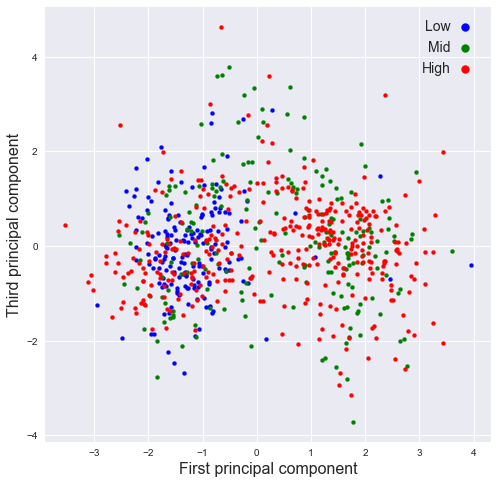

<ipython-input-3-9eb8e3ebafec>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


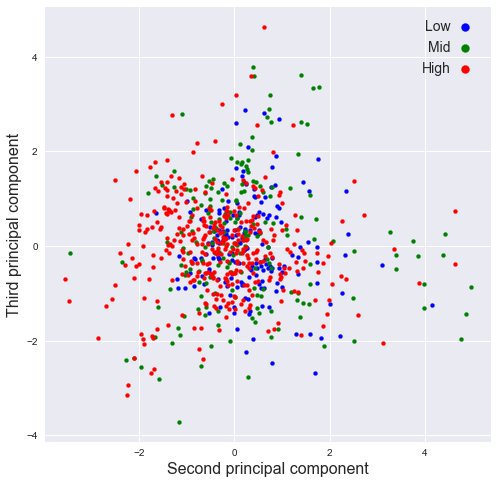

In [3]:
# pre-process the data
n_orig   = fv0.shape[0]                 # original number of training points
p_orig   = np.sum(fv0>0,axis=0)/n_orig  # fraction of nonzero components for each feature
noMS     = p_orig>0.05
fv1      = fv0[:,noMS]            # drop features with less than 5% nonzero components
noNA     = np.invert(np.isnan(rs0))     # find available response values
SMA_feat = fv1[noNA,:]                  # filtered feature values
SMA_fnam = fn0[noMS]                    # filtered feature names
SMA_resp = rs0[noNA]                    # filtered response values

n,d = SMA_feat.shape # filtered data dimensions

# add random perturbation to the features
sg = 2
SMA_feat_ns = SMA_feat + np.random.normal(0,sg,[n,d])
SMA_feat_ns = (SMA_feat_ns + abs(SMA_feat_ns))/2 # clamp values at zero

# standardize data
SMA_feat_std = ssc().fit_transform(SMA_feat_ns)

# compute PCA
pca = PCA()
pr = pca.fit_transform(SMA_feat_std)

# PCA plots
def plot_PCA(X,Y,resp,thrs,nam1,nam2):
    Ihigh = resp>thrs[1]
    Imid = (resp>thrs[0])&(resp<=thrs[1])
    Ilow = resp<=thrs[0]  
    plt.style.use('seaborn')
    plt.xlabel(nam1+' principal component',fontsize=16)
    plt.ylabel(nam2+' principal component',fontsize=16)
    plt.scatter(X[Ilow],Y[Ilow],c='blue',s=16,marker='o',label='Low')
    plt.scatter(X[Imid],Y[Imid],c='green',s=16,marker='o',label='Mid')
    plt.scatter(X[Ihigh],Y[Ihigh],c='red',s=16,marker='o',label='High')
    plt.xticks(size='medium')
    plt.yticks(size='medium')
    plt.legend(fontsize=14,facecolor='white',markerscale=2,markerfirst=False,handletextpad=0)
    plt.show()

fig=plt.figure(figsize=(8,8))#,dpi=150)
plot_PCA(pr[:,0],pr[:,1],SMA_resp,[2,8],'First','Second')
fig.savefig('c09_PCA-a.png',bbox_inches="tight",facecolor="white")
fig=plt.figure(figsize=(8,8))#,dpi=150)
plot_PCA(pr[:,0],pr[:,2],SMA_resp,[2,8],'First','Third')
fig.savefig('c09_PCA-b.png',bbox_inches="tight",facecolor="white")
fig=plt.figure(figsize=(8,8))#,dpi=150)
plot_PCA(pr[:,1],pr[:,2],SMA_resp,[2,8],'Second','Third')
fig.savefig('c09_PCA-c.png',bbox_inches="tight",facecolor="white")

### (b)

> Plot the percentage of variance explained by each PC as a function of PC number. This is called the *scree plot*. Now plot the cumulative percentage of variance explained by the PCs as a function of PC number. How many PCs are needed to explain $95\%$ of the variance.
>
> Coding hint: use the attribute `explained_variance_ratio_` and the `cusum()` method.

Text(0.5, 1.0, 'Scree plot')

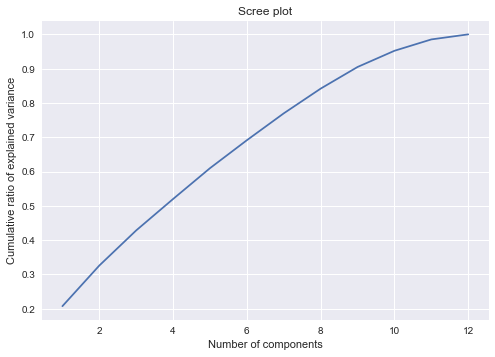

In [22]:
n = len(pca.explained_variance_ratio_)
plt.plot( np.arange(1, n+1) ,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative ratio of explained variance")
plt.title("Scree plot")

### (c)

> Print the loading matrix $W$ (this is the matrix of eigenvectors, ordered by PC number from left to right). The absolute value of the coefficients indicate the relative importance of each original variable (row of $W$) in the corresponding PC (column of $W$).

In [44]:
#for i in range(0,n):
#    print("Component", i+1,":",pca.components_[i].T)
    
wd = pd.DataFrame(pca.components_.T, columns = ["PC{}".format(i+1) for i in range(0,n)])
wd

Component 1 : [ 0.49537069 -0.52384215 -0.00823448 -0.22014613  0.41962342 -0.02989006
 -0.00440421  0.12749216 -0.30672779 -0.05345558  0.04899567 -0.37292663]
Component 2 : [-0.36100012  0.11641431  0.50079441 -0.42784738  0.44939328  0.1643334
  0.14541426 -0.27024368  0.10301297  0.0906039  -0.24988967 -0.13370069]
Component 3 : [-0.01020239 -0.16354023 -0.15373209  0.368666   -0.07001205  0.48852578
  0.34753501 -0.39537917  0.17718369 -0.36575157 -0.04544335 -0.35454838]
Component 4 : [ 0.01908155 -0.20918303  0.14460856 -0.22825793 -0.13148277  0.59556794
 -0.02632559  0.59329668  0.3048485  -0.11729511  0.01589211  0.22636001]
Component 5 : [-0.02049227 -0.16171263  0.31447854  0.06493081  0.09769116  0.04367708
 -0.33291643 -0.31806516  0.14489578 -0.1000821   0.76978766  0.15258454]
Component 6 : [-0.01688882 -0.09001391 -0.07775819  0.01646592 -0.02798912  0.18710508
  0.57656046 -0.01281892 -0.15435136  0.68016471  0.34312021  0.11285818]
Component 7 : [-0.01674302 -0.15532

### (d)

> Identify which two features contribute the most to the discriminating first PC and plot the data using these top two features. What can you conclude about the effect of these two features on the coercivity? This is an application of PCA to feature selection.

In [61]:
most_id = wd["PC1"].argsort()[-2:].to_numpy()

Text(0, 0.5, 'Feature 0')

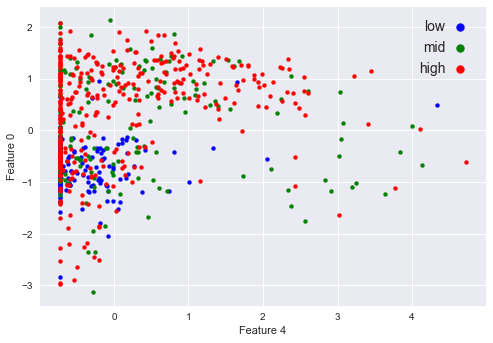

In [85]:
thrs = [2, 8]
id_d = {
    "high": SMA_resp>thrs[1],
    "mid": (SMA_resp>thrs[0])&(SMA_resp<=thrs[1]),
    "low": SMA_resp<=thrs[0]  
}
cs = ["blue", "green", "red"]

for i, lb in enumerate(["low", "mid", "high"]):
    plt.scatter(SMA_feat_std[id_d[lb], most_id[0]], SMA_feat_std[id_d[lb], most_id[1]],\
               c= cs[i],s=16,marker='o',label=lb)
plt.legend(fontsize=14,facecolor='white',markerscale=2,markerfirst=False,handletextpad=0)
plt.xticks(size='medium');
plt.yticks(size='medium');
plt.xlabel("Feature {}".format(most_id[0]))
plt.ylabel("Feature {}".format(most_id[1]))

Relations
1. High: low feature 0 and low feature 4
2. Mid: medium feature 0 and low feature 4
3. low: high feature 4 and medium feature 0

## Problem 11.11

> Apply linear regression to the stacking fault energy (SFE) data set.

### (a)

> Modify `c11_SFE.py` to fit a univariate linear regression model (with intercept) separately
to each of the seven variables remaining after preprocessing (two of these were already
done in Example 11.4. List the fitted coefficients, the normalized RSS, and the $R^2$ statsitic for each model. 
>
> Which one of the seven variables is the best predictor of SFE, according to $R^2$? Plot the SFE response against each of the seven variables, with regression lines superimposed. How do you interpret these results?

In [211]:
""""
Foundations of Pattern Recognition and Machine Learning
Chapter 11 Figure 11.3
Author: Ulisses Braga-Neto

Regression with a line example with stacking fault energy dataset
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('seaborn')

<ipython-input-211-da1151b4ce17>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [257]:
def r2(model, x, y):
    y_pred = model.predict(x)
    return r2_score(y, y_pred)

def fitted_coef(model):
    return model.coef_[0]

def fitted_int(model):
    return model.intercept_

def normalized_RSS(model, xrr, yr):
    y_pred = model.predict(xrr)
    rss = np.sum(np.square(y_pred - yr)) / len(y_pred)
    return rss

In [258]:
SFE_orig = pd.read_table('data/Stacking_Fault_Energy_Dataset.txt')

In [259]:
# pre-process the data

n_orig = SFE_orig.shape[0] 			# original number of rows
p_orig = np.sum(SFE_orig>0)/n_orig 	# fraction of nonzero entries for each column
SFE_colnames = SFE_orig.columns[p_orig>0.6]
SFE_col = SFE_orig[SFE_colnames]		# throw out columns with fewer than 60% nonzero entries
m_col = np.prod(SFE_col,axis=1)
SFE = SFE_col.iloc[np.nonzero(m_col.to_numpy())] # throw out rows that contain any zero entries

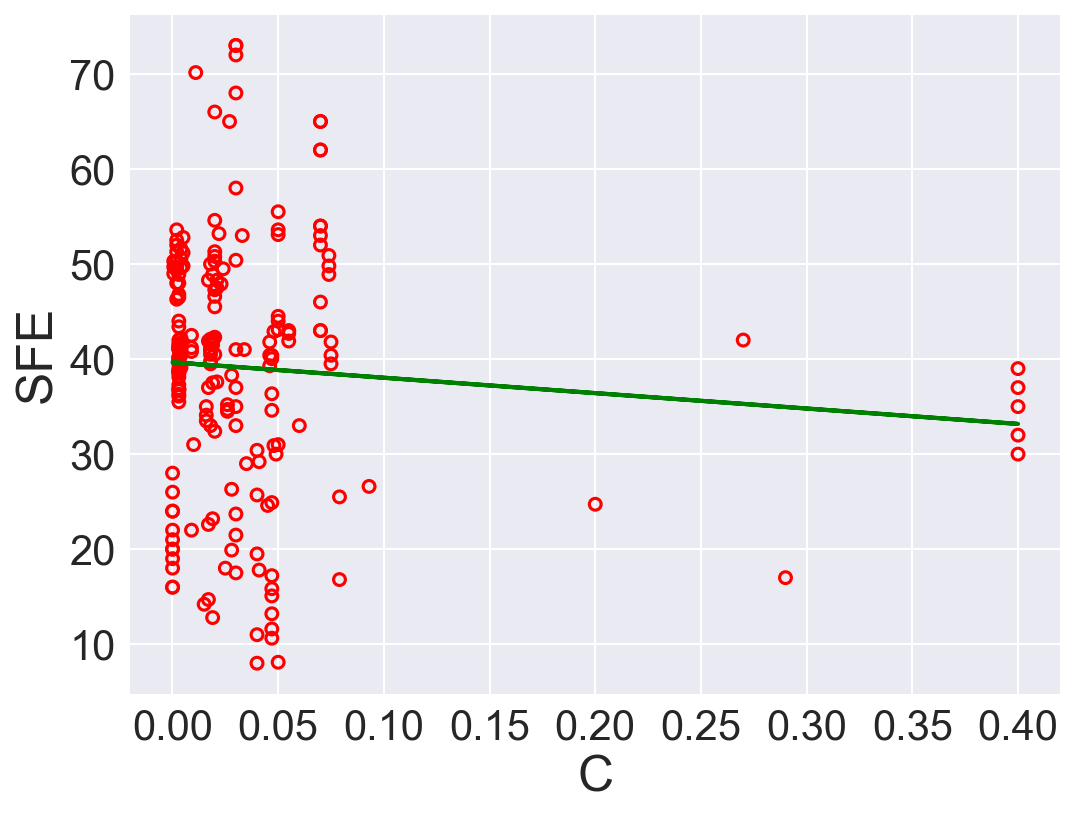

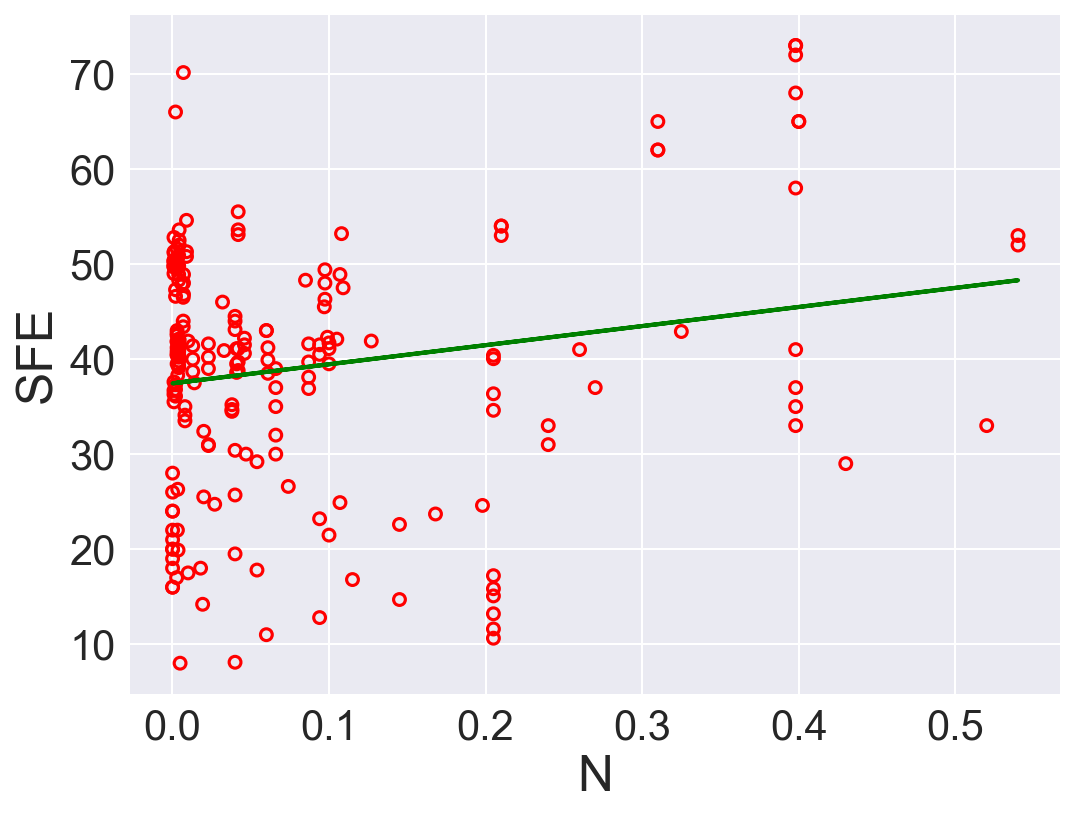

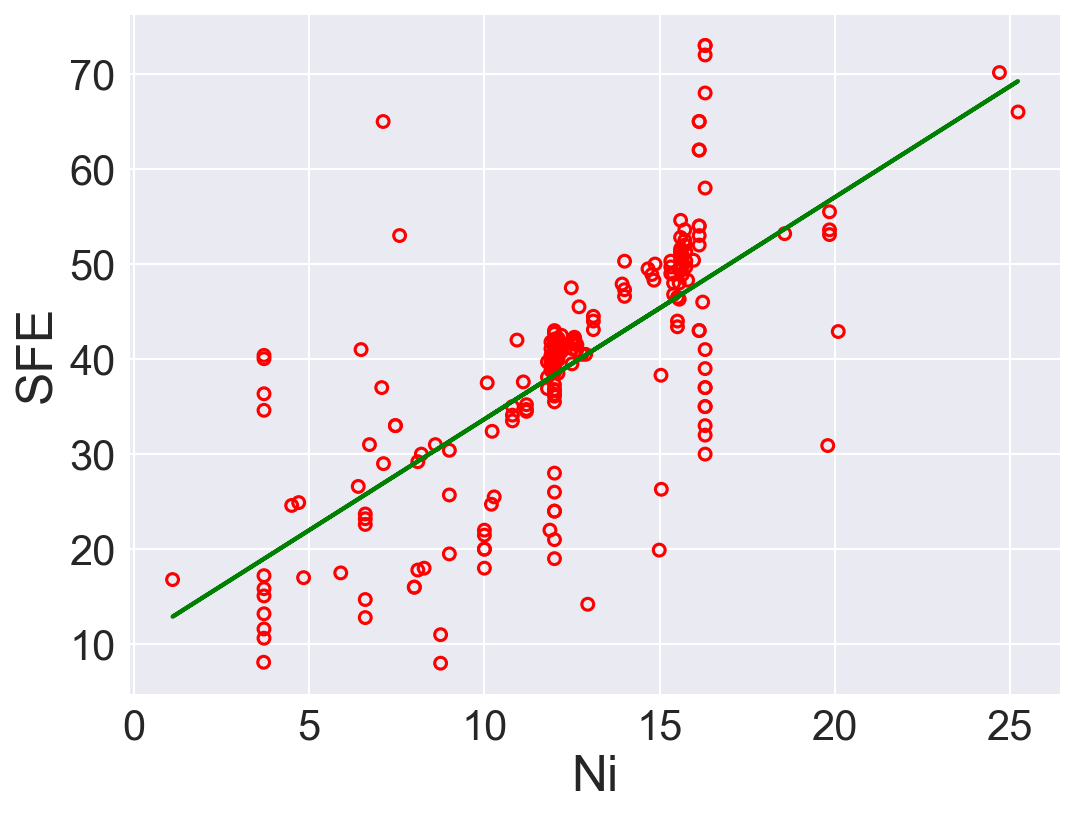

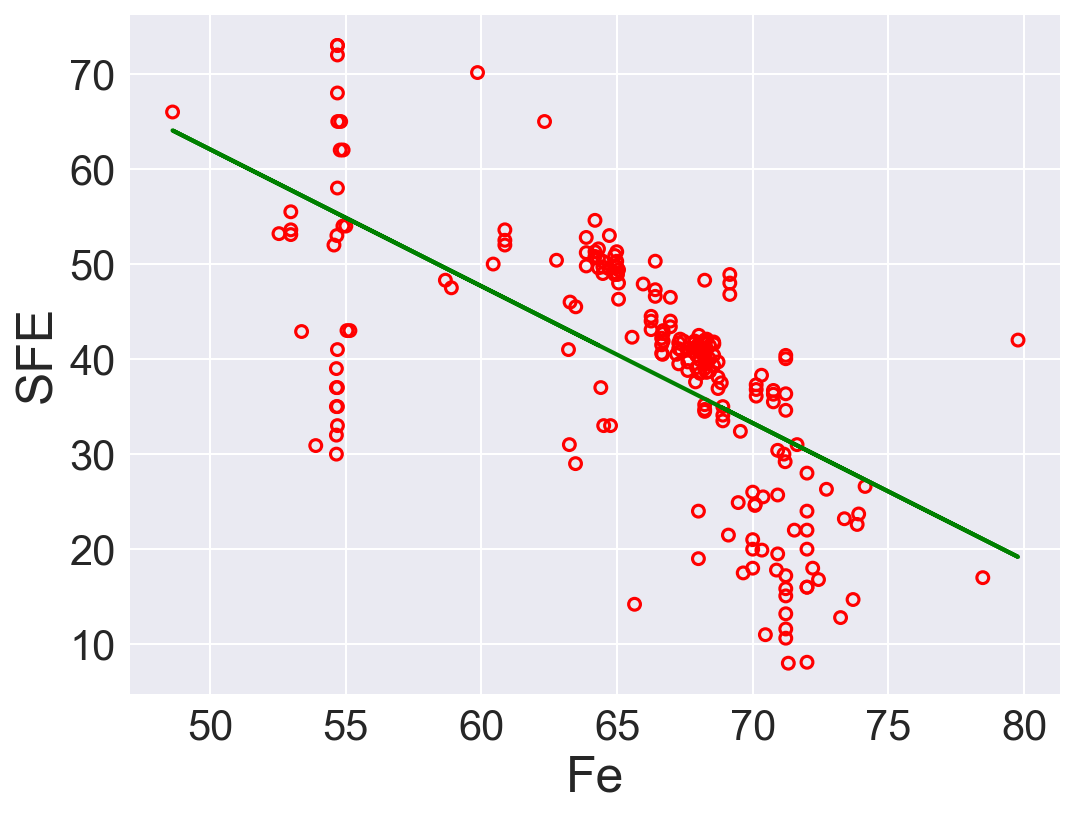

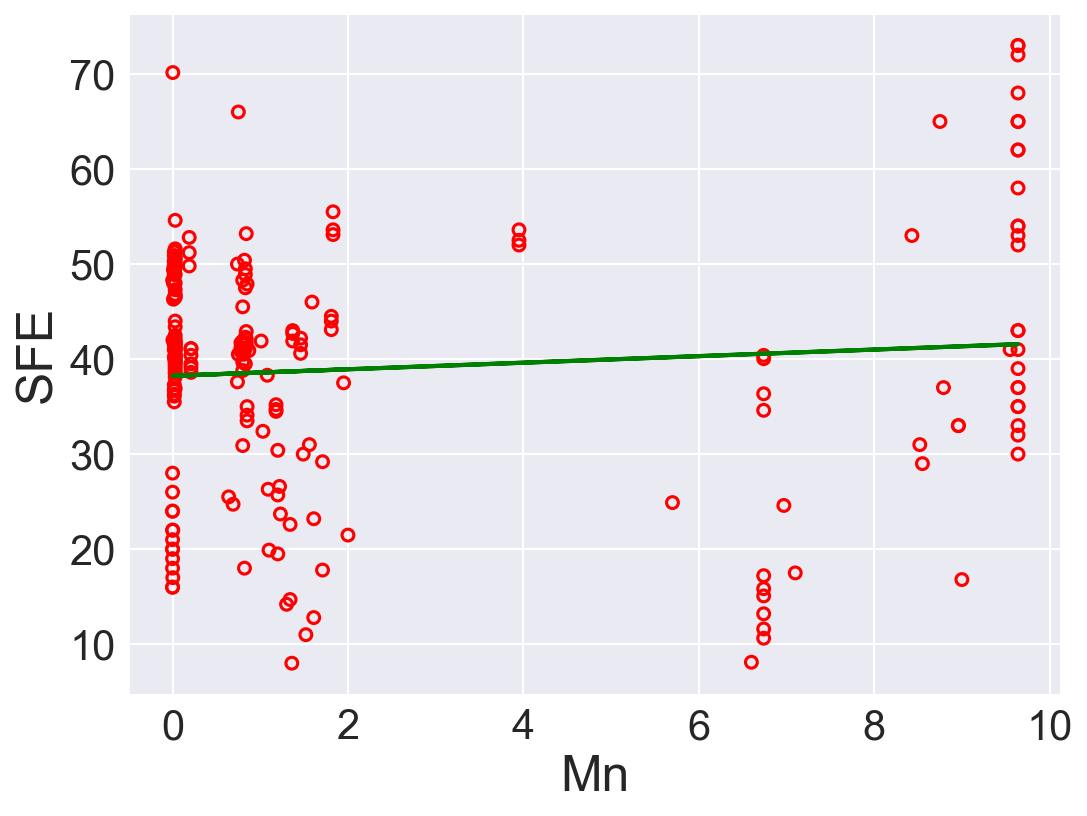

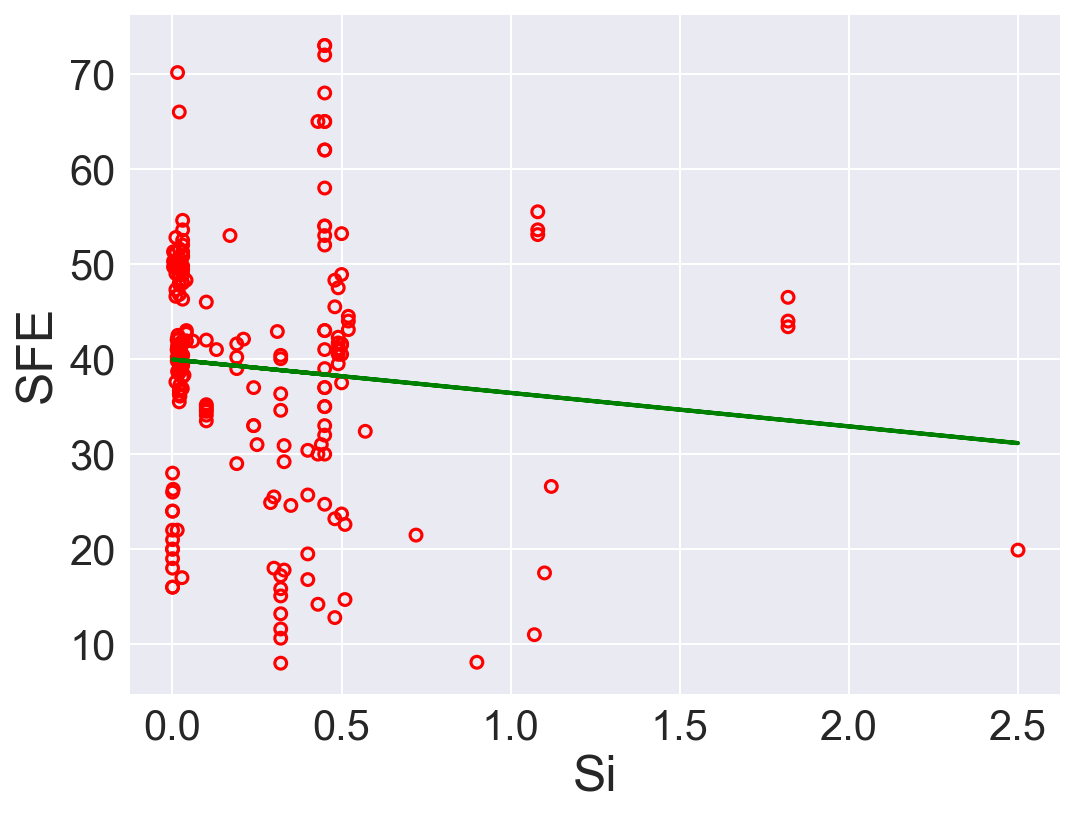

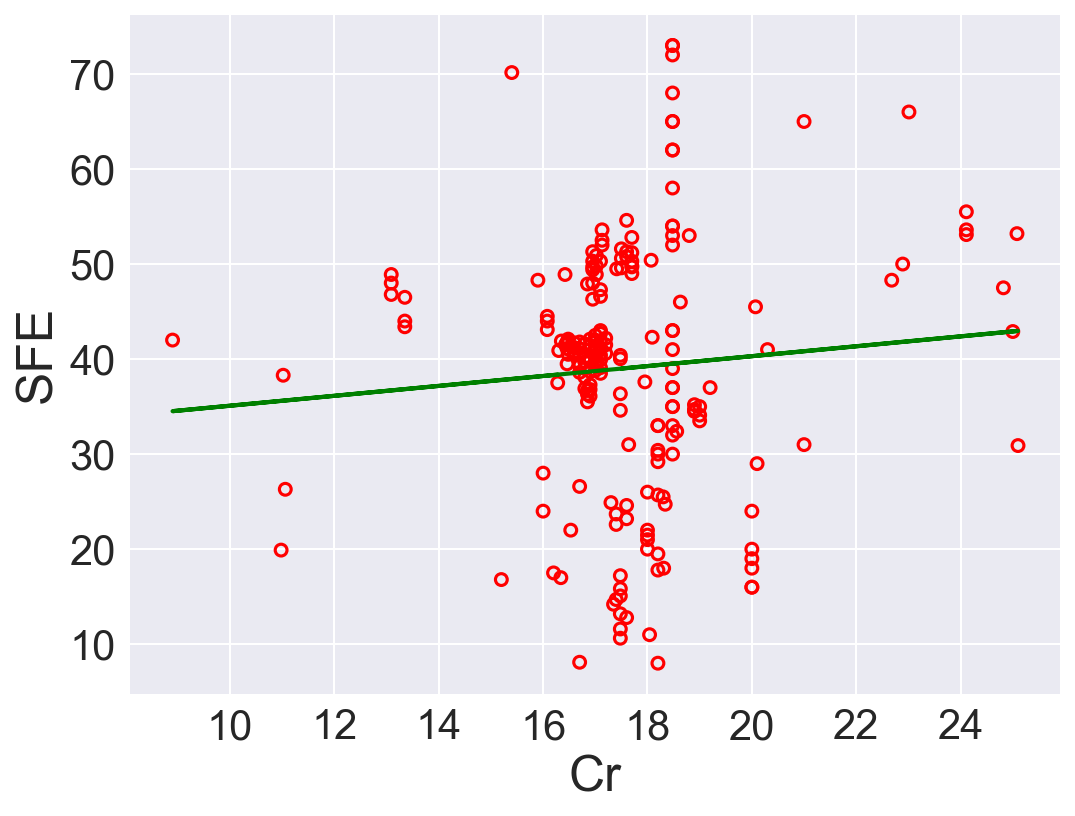

In [260]:
yr = SFE['SFE']
model = LinearRegression()
res = {
    "feature": [],
    "slope": [],
    "intercept": [],
    "Norm RSS":[],
    "R2": []
}

for feat in SFE.keys()[:-1].to_numpy():
    xr = np.array(SFE[feat])
    xrr = xr.reshape((-1,1)) # format xr for Numpy regression code   
    model.fit(xrr,yr)
    
    # Performance
    res["feature"].append(feat)
    res["slope"].append(fitted_coef(model))
    res["intercept"].append(fitted_int(model))
    res["Norm RSS"].append(normalized_RSS(model, xrr, yr))
    res["R2"].append(r2(model, xrr, yr))
    
    # Plotting
    fig=plt.figure(figsize=(8,6),dpi=150)
    plt.xlabel(feat,size=24)
    plt.ylabel('SFE',size=24)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.scatter(xr,yr,s=32,marker='o',facecolor='none',edgecolor='r',linewidth=1.5)
    ## Plotting regression model
    plt.plot(xrr,model.predict(xrr),c='green',lw=2)
    plt.show()

In [261]:
pd.DataFrame(res)

,feature,slope,intercept,Norm RSS,R2
0,C,-16.200376,39.658087,167.480699,0.006946
1,N,20.088487,37.447183,162.756200,0.034959
2,Ni,2.335338,10.324642,84.669120,0.497966
3,Fe,-1.440431,134.100015,100.297936,0.405297
4,Mn,0.345602,38.236325,167.230592,0.008429
5,Si,-3.520817,39.959897,167.129698,0.009027
6,Cr,0.521318,29.878868,167.428848,0.007254


According to $R^2$, `Ni` is the best predictor that has positive linear relation between `SFE`. Also, `Fe` has high correlation coefficient. The rest of the features performs low correlation between `SFE`. As we can see in the linear regression plots.

### (b)

> Perform multivariate linear regression with a linear forward wrapper search (for 1 to 5 variables) using the $R^2$ statistic as the search criterion. List the normalized RSS, the $R^2$ statistic, and the *adjusted* $R^2$ statistic for each model. Which would be the most predictive model according to adjusted $R^2$? How do you compare these results with those of item (a)?


Use the adjusted $R^2$ formula:

$$R^{2}_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-k-1}$$

Ref: Sequential forward search
https://vitalflux.com/sequential-forward-selection-python-example/

In [264]:
def adr2(model, x, y):
    r = r2(model,x,y)
    N = x.shape[0]
    p = x.shape[1]
    return 1 - (1-r)*(N-1)/(N-p-1)

class SequentialForwardSearch():
    def __init__(self, clf):
        self.clf = clone(clf)
    
    def search(self, xs, ys):
        unchosen_ids = list(range(xs.shape[1]))
        chosen_ids = []
        self.scores = []
        self.subset = []
        self.r2 = []
        self.rss = []
        self.adr2 = []
        
        while len(unchosen_ids) > 0:
            scrs = [] #scores record
            
            for i in unchosen_ids:
                subset = chosen_ids + [i]
                scrs.append( self._score(xs[:, subset], ys))
            
            
            best_i = np.argmax(scrs) #best base
            chosen_ids.append(unchosen_ids.pop(best_i)) # swap
            
            # Rcord
            self.scores.append(scrs[best_i])
            
            # Performance
            self.clf.fit(xs[:, chosen_ids], ys)
            self.r2.append(r2(self.clf, xs[:, chosen_ids], ys))
            self.rss.append(normalized_RSS(self.clf, xs[:, chosen_ids], ys))
            self.adr2.append(adr2(self.clf, xs[:, chosen_ids], ys))
            
        self.subset = chosen_ids
                
    def _score(self, xs, ys):
        self.clf.fit(xs, ys)
        return r2(self.clf, xs, ys)
        

In [267]:
# data
xr = SFE.drop("SFE", axis=1).to_numpy()[:, 0:5]
yr = SFE['SFE']

# Search
sh = SequentialForwardSearch(LinearRegression())
sh.search(xr, yr)
ids_sh = sh.subset

## Performance
fts = [ str([res["feature"][j] for j in sh.subset[0:i+1]]) for i in range(0, len(sh.subset))] #features
pd.DataFrame({"Feature": fts, "R2": sh.r2, "Norm RSS": sh.rss, "Adjust R2": sh.adr2})

,Feature,R2,Norm RSS,Adjust R2
0,['Ni'],0.497966,84.669120,0.495564
1,"['Ni', 'N']",0.553514,75.300860,0.549221
2,"['Ni', 'N', 'C']",0.572860,72.038072,0.566670
3,"['Ni', 'N', 'C', 'Fe']",0.579493,70.919455,0.571328
4,"['Ni', 'N', 'C', 'Fe', 'Mn']",0.579832,70.862215,0.569584


If solely depends on $R^2$, model with $5$ is the best option. However, after adding regularization term with adjusted $R^2$, model with $4$ features is the best.